#### Traitement des données MétéoFrance

- Données trouvées sur https://meteo.data.gouv.fr/
- Entre mi-mars et mi-juin 2025 (correspondant aux semaines des périodes de mesures)
- Sur trois stations pour le moment :
    - Petit Canal (le plus proche Plage Babin)
    - Les Abymes (proche plage Babin, légèrement moins)
    - Aéroport (proche Rivière Salée, moins proche Plage Babin)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [5]:
df=pd.read_csv('clim-base_quot_vent-971-2025.csv')

df

,num_poste,num_poste.1,nom_usuel,lat,lon,alti,aaaammjj,rr,qrr,tn,...,hxi2,qhxi2,fxi3s,qfxi3s,dxi3s,qdxi3s,hxi3s,qhxi3s,drr,qdrr
0,97101015,97101015,LE RAIZET AERO,16.2640,-61.516333,11,20250105,0.4,1,22.2,...,NaN,NaN,7.3,1.0,NaN,NaN,1519.0,9.0,9.0,9.0
1,97101014,97101014,LES ABYMES CHAZEAU_SAPC,16.2875,-61.453167,95,20250104,15.0,1,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97101014,97101014,LES ABYMES CHAZEAU_SAPC,16.2875,-61.453167,95,20250105,1.6,1,21.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97101015,97101015,LE RAIZET AERO,16.2640,-61.516333,11,20250110,0.0,1,18.8,...,NaN,NaN,6.5,1.0,NaN,NaN,1156.0,9.0,0.0,9.0
4,97101014,97101014,LES ABYMES CHAZEAU_SAPC,16.2875,-61.453167,95,20250111,0.0,1,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,97101014,97101014,LES ABYMES CHAZEAU_SAPC,16.2875,-61.453167,95,20250102,0.6,1,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,97101015,97101015,LE RAIZET AERO,16.2640,-61.516333,11,20250102,0.0,1,21.0,...,NaN,NaN,11.3,1.0,NaN,NaN,1246.0,9.0,12.0,9.0
497,97101015,97101015,LE RAIZET AERO,16.2640,-61.516333,11,20250103,0.0,1,20.3,...,NaN,NaN,9.9,1.0,NaN,NaN,1110.0,9.0,2.0,9.0
498,97101014,97101014,LES ABYMES CHAZEAU_SAPC,16.2875,-61.453167,95,20250103,0.0,1,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['date'] = pd.to_datetime(df['aaaammjj'], format='%Y%m%d')
df = df.sort_values(by='date')
df = df[df['date'] > pd.to_datetime('2025-03-24')]
df = df[df['date'] < pd.to_datetime('2025-06-15')]


df_aero=df[df['nom_usuel']=='LE RAIZET AERO']
df_chazeau=df[df['nom_usuel']=='LES ABYMES CHAZEAU_SAPC']
df_petitcanal=df[df['nom_usuel']=='PETIT-CANAL GODET-INRAE']

In [13]:
df_petitcanal.head()

,num_poste,num_poste.1,nom_usuel,lat,lon,alti,aaaammjj,rr,qrr,tn,...,qhxi2,fxi3s,qfxi3s,dxi3s,qdxi3s,hxi3s,qhxi3s,drr,qdrr,date
263,97119008,97119008,PETIT-CANAL GODET-INRAE,16.405,-61.481667,35,20250325,1.5,1,23.6,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-25
260,97119008,97119008,PETIT-CANAL GODET-INRAE,16.405,-61.481667,35,20250326,2.0,1,24.7,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-26
259,97119008,97119008,PETIT-CANAL GODET-INRAE,16.405,-61.481667,35,20250327,0.0,1,23.6,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-27
261,97119008,97119008,PETIT-CANAL GODET-INRAE,16.405,-61.481667,35,20250328,0.5,1,23.8,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-28
264,97119008,97119008,PETIT-CANAL GODET-INRAE,16.405,-61.481667,35,20250329,3.5,1,23.1,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-29


Text(0, 0.5, 'Précipitations [mm]')

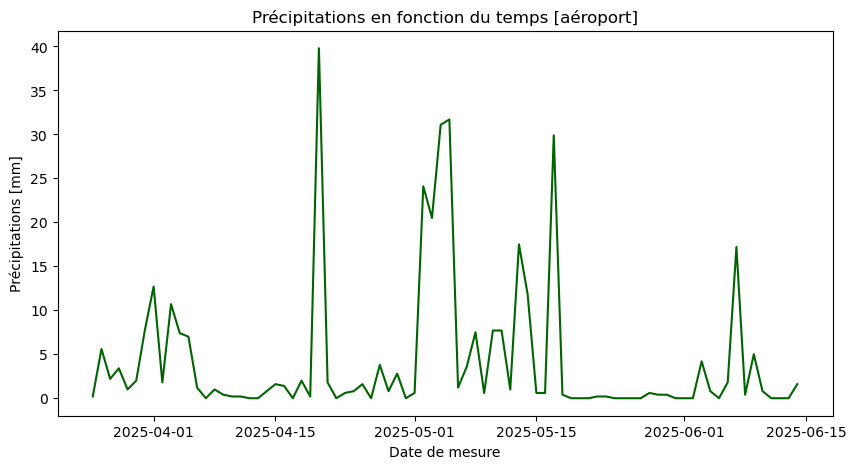

In [19]:
# Plot les précipitations journalières en fonction du temps

plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_aero['date'],df_aero['rr'], color='darkgreen')
plt.title('Précipitations en fonction du temps [aéroport]')
plt.xlabel('Date de mesure')
plt.ylabel('Précipitations [mm]')

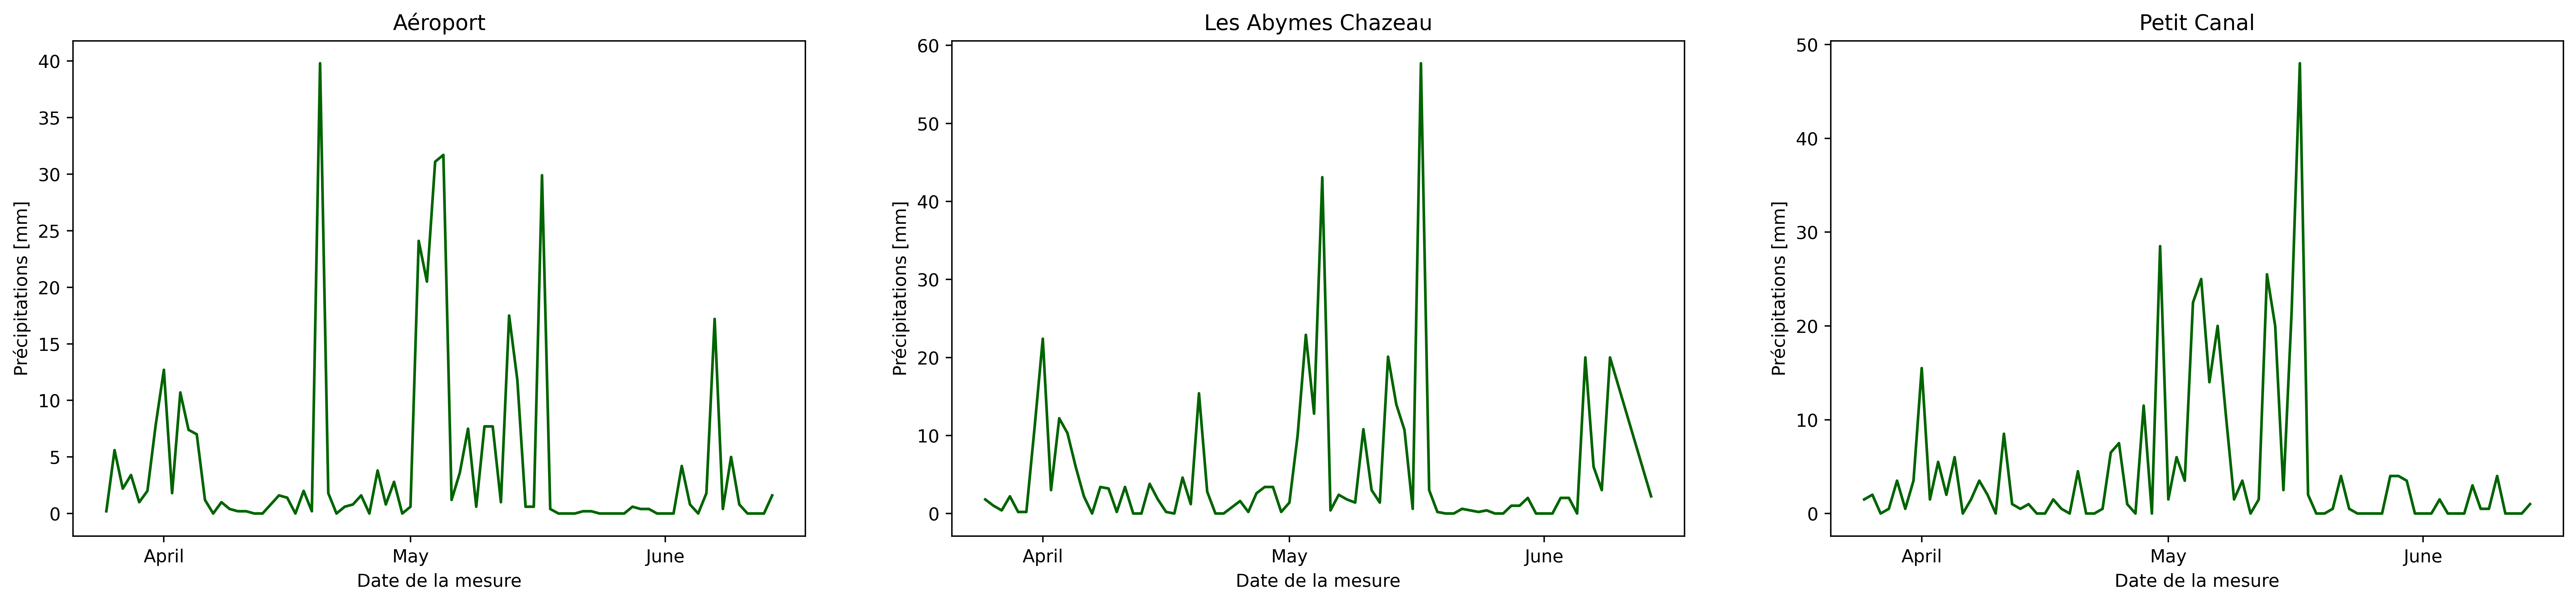

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5), dpi=500)

axs[0].plot(df_aero['date'],df_aero['rr'], color='darkgreen')
axs[0].set_title('Aéroport')
axs[0].set_xlabel('Date de la mesure')
axs[0].set_ylabel('Précipitations [mm]')
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

axs[1].plot(df_chazeau['date'],df_chazeau['rr'], color='darkgreen')
axs[1].set_title('Les Abymes Chazeau')
axs[1].set_xlabel('Date de la mesure')
axs[1].set_ylabel('Précipitations [mm]')
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

axs[2].plot(df_petitcanal['date'],df_petitcanal['rr'], color='darkgreen')
axs[2].set_title('Petit Canal')
axs[2].set_xlabel('Date de la mesure')
axs[2].set_ylabel('Précipitations [mm]')
axs[2].xaxis.set_major_locator(mdates.MonthLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

#plt.savefig('precipitations_journalières.pdf')

Premières interprétations : 
- Trois 'saisons' : une saison plutôt sèche pour commencer, suivi de pluies en mai et d'un retour de sécheresse en juin 

In [45]:
# Calcul des précipitations hebdomadaires

hebdo_aero = df_aero.set_index('date')
hebdo_petitcanal = df_petitcanal.set_index('date')
hebdo_chazeau = df_chazeau.set_index('date')

prec_hebdo_aero = hebdo_aero['rr'].resample('W').sum()
prec_hebdo_petitcanal = hebdo_petitcanal['rr'].resample('W').sum()
prec_hebdo_chazeau = hebdo_chazeau['rr'].resample('W').sum()


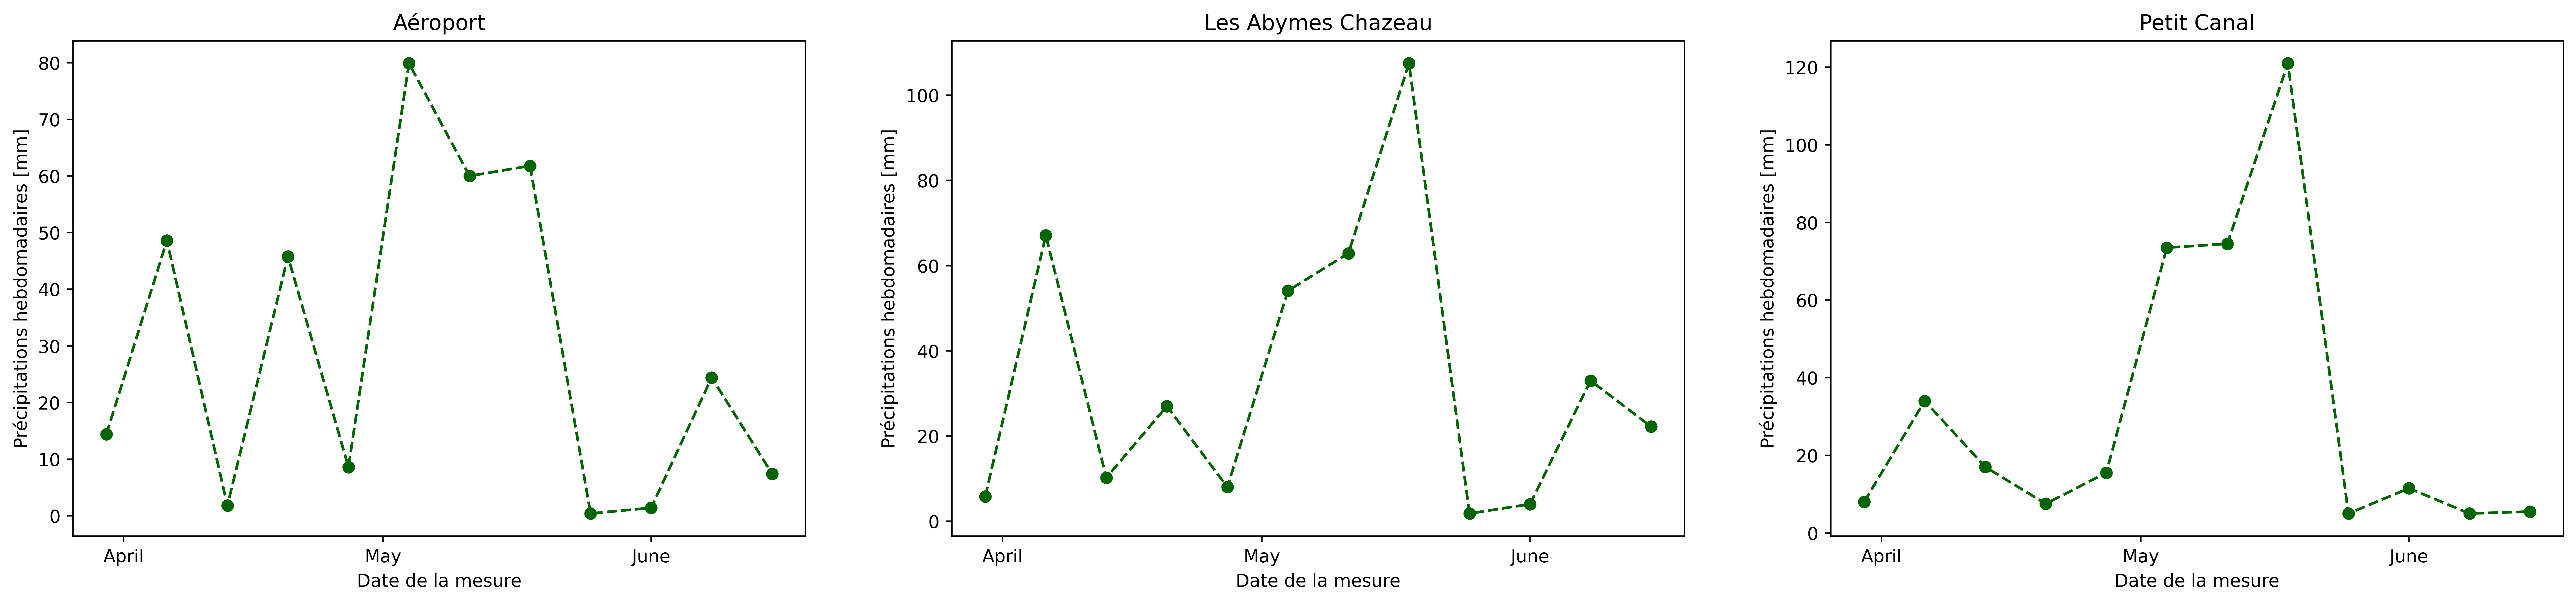

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5), dpi=500)

axs[0].plot(prec_hebdo_aero, 'o--', color='darkgreen')
axs[0].set_title('Aéroport')
axs[0].set_xlabel('Date de la mesure')
axs[0].set_ylabel('Précipitations hebdomadaires [mm]')
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

axs[1].plot(prec_hebdo_chazeau, 'o--', color='darkgreen')
axs[1].set_title('Les Abymes Chazeau')
axs[1].set_xlabel('Date de la mesure')
axs[1].set_ylabel('Précipitations hebdomadaires [mm]')
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

axs[2].plot(prec_hebdo_petitcanal, 'o--', color='darkgreen')
axs[2].set_title('Petit Canal')
axs[2].set_xlabel('Date de la mesure')
axs[2].set_ylabel('Précipitations hebdomadaires [mm]')
axs[2].xaxis.set_major_locator(mdates.MonthLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%B'))

#plt.savefig('precipitations_hebdomadaires.pdf')

Text(0, 0.5, 'Fréquence')

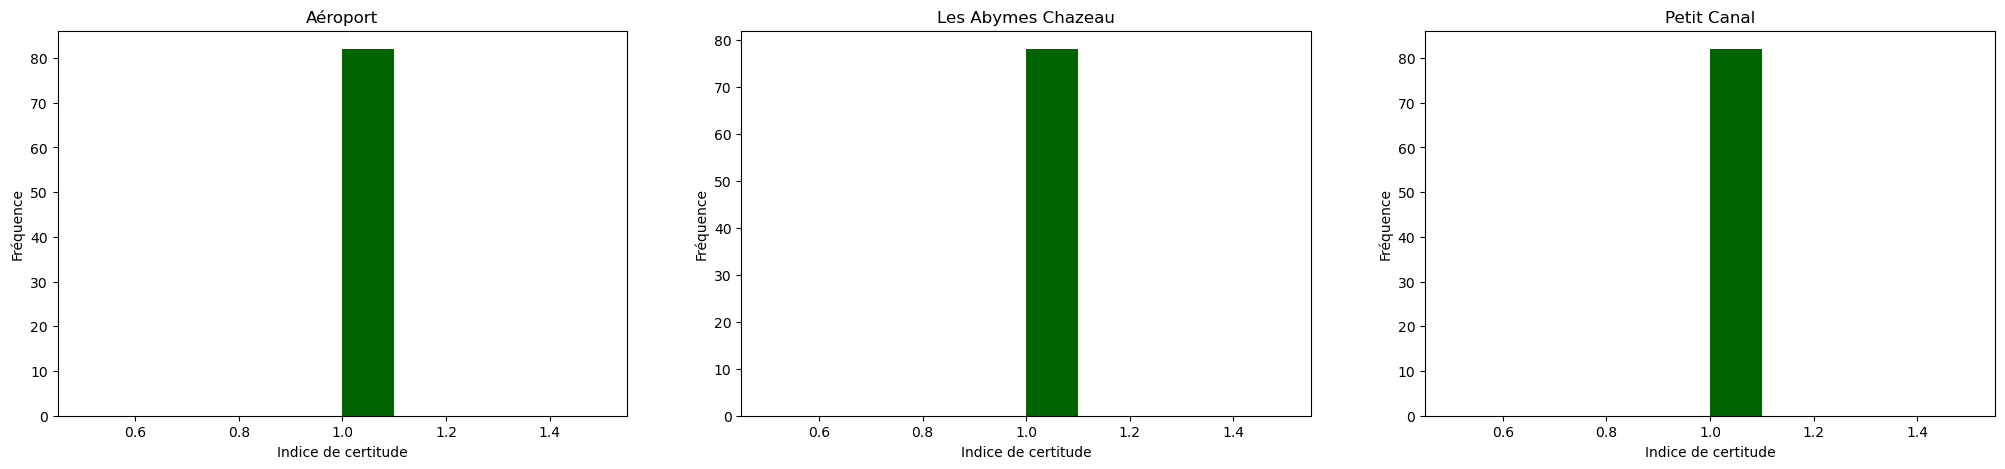

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].hist(df_aero['qrr'], color='darkgreen')
axs[0].set_title('Aéroport')
axs[0].set_xlabel('Indice de certitude')
axs[0].set_ylabel('Fréquence')

axs[1].hist(df_chazeau['qrr'], color='darkgreen')
axs[1].set_title('Les Abymes Chazeau')
axs[1].set_xlabel('Indice de certitude')
axs[1].set_ylabel('Fréquence')

axs[2].hist(df_petitcanal['qrr'], color='darkgreen')
axs[2].set_title('Petit Canal')
axs[2].set_xlabel('Indice de certitude')
axs[2].set_ylabel('Fréquence')

Aucun soucis sur les données météo : elles sont 100 % fiables (indice à 1), sachant que l'indice va de 1 (très fiable) à 6 (données très peu fiable)

##### Avis de Chat sur le choix de la station :

"Même avec des données complètes des deux stations, Le Raizet Aéroport reste l’option la plus représentative de la météo de la plage de Babin, car : son environnement est plus semblable (côtier, plat, ouvert), l’altitude est plus proche, il reflète mieux l’effet du vent et de la mer."